In [279]:
#To open the data file

with open('Pressure_sensor_output.txt') as f:
    for line in f:
      data = [int(float(line.split()[0])) for line in f]


In [280]:
#Transfer Funtion to get Pressure value in mmHg from Sensor output

Pressure_data = []
for output in data:
  output = ((output-419430.4)*300)/(3774873.6-419430.4)
  Pressure_data.append(output)

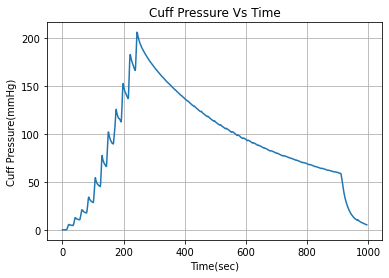

In [281]:
#To plot the Pressure data

from matplotlib import pyplot as plt
plt.plot(Pressure_data)
plt.title("Cuff Pressure Vs Time")
plt.ylabel("Cuff Pressure(mmHg)")
plt.xlabel("Time(sec)")
plt.grid()

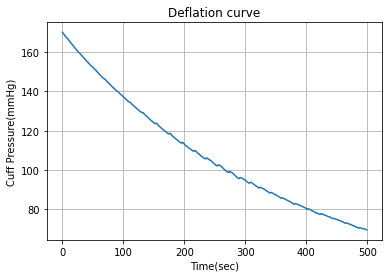

In [282]:
#To plot Deflation Curve

Deflation  = Pressure_data[300:800]   #Shows Deflation region
plt.plot(Deflation)
plt.title("Deflation curve")
plt.ylabel("Cuff Pressure(mmHg)")
plt.xlabel("Time(sec)")
plt.grid()


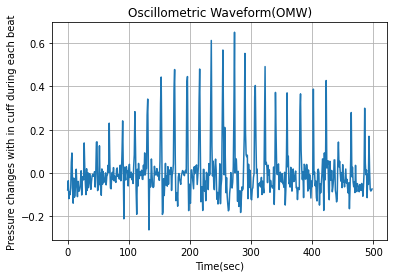

In [283]:
# To plot Oscillometric Waveform(OMW)

Deflation = Pressure_data[300:800]
Difference = list()
for i in range(1, len(Deflation)):
	value = Deflation[i] - Deflation[i - 1]
	Difference.append(value)

#Using Detrending to get Oscillometric Waveform

import scipy.signal
OMW=scipy.signal.detrend(Difference,type = 'linear')
plt.grid()
plt.plot(OMW)
plt.title("Oscillometric Waveform(OMW)")
plt.ylabel("Pressure changes with in cuff during each beat")
plt.xlabel("Time(sec)")
plt.show()


In [284]:
#To Visually represent Oscillometric Waveform

from scipy.signal import find_peaks
import plotly.graph_objects as go
indices = find_peaks(OMW,distance=15)[0]
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=OMW,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=indices,
    y=[OMW[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='green',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

In [285]:
#To caluclate closest systolic and diastolic amplitudes on OMWE

Max_amp =0.6508195
systolic_coef=0.5
diastolic_coef=0.8
Closest_Systolic_amp= Max_amp * systolic_coef
Closest_Diastolic_amp= Max_amp * diastolic_coef
print("Closest_Systolic_amp=",Closest_Systolic_amp,)
print("Closest_Diastolic_amp=",Closest_Diastolic_amp)

Closest_Systolic_amp= 0.32540975
Closest_Diastolic_amp= 0.5206556


In [286]:
x=indices
y=[OMW[j] for j in indices]
Maximum_value_of_the_OMWE=max(y)
p=y.index(Maximum_value_of_the_OMWE)
Systolic_list= np.array(y[0:p+1])
Diastolic_list= np.array(y[p:])

#To find Systolic amplitude
given_value=Closest_Systolic_amp
absolute_difference_function = lambda list_value : abs(list_value - given_value)
Systolic_amp = min(Systolic_list, key=absolute_difference_function)
print("Systolic_Amplitude= ",Systolic_amp)

#To find Diastolic amplitude
given_value=Closest_Diastolic_amp
absolute_difference_function = lambda list_value : abs(list_value - given_value)
Diastolic_amp = min(Diastolic_list, key=absolute_difference_function)
print("Diastolic_Amplitude= ",Diastolic_amp)

y1 = y.index(Systolic_amp)
X_Systolic = x[y1]
print ("Systolic_Amp_TimePulse_at= ",X_Systolic)

y2 =y.index(Diastolic_amp)
X_Diastolic = x[y2]
print("Diastolic_Amp_Timepulse_at= ",X_Diastolic)

Systolic_Amplitude=  0.3416871875902293
Diastolic_Amplitude=  0.49200961320234504
Systolic_Amp_TimePulse_at=  131
Diastolic_Amp_Timepulse_at=  323


In [287]:
#To find Systolic and Diastolic pressures

Systolic_Pressure = Pressure_data[300+X_Systolic]
print("Systolic Pressure =",Systolic_Pressure)

Diastolic_pressure = Pressure_data[300+X_Diastolic]
print("Diastolic Pressure =",Diastolic_pressure)

Systolic Pressure = 129.20706868171692
Diastolic Pressure = 90.88554382324219


In [288]:
#To find Heart Rate

No_of_peaks= 5                    # Number of peaks between 175 and 290
Peak_distance= 290-175
Heart_rate = (40*No_of_peaks*60)/Peak_distance
print("Heart Rate =", Heart_rate)

Heart Rate = 104.34782608695652
